## Imports and functions

In [1]:
data_path = "../datasets"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import pickle
import math
import cmath
import numpy as np
import scipy
from scipy import signal
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.ndimage import gaussian_filter1d

In [2]:

def load_data(path):
    """
    This function loads the data

    Inputs:
    path= path to the pickle file that stores the data in the form of a python dictionary

    Outputs:
    u,x,t,dx,dt

    """
    file_to_read = open(path, "rb")
    loaded_dictionary = pickle.load(file_to_read)
    u = loaded_dictionary["u"]
    x = loaded_dictionary["x"]
    t = loaded_dictionary["t"]
    dx = x[2]-x[1]
    dt = t[2]-t[1]

    return u,x,t


In [48]:
def psd_plot(ts,T):
    N=len(ts)
    f, Pxx_den = signal.periodogram(ts,1/T)
    plt.loglog(f[1:],Pxx_den[1:])
    plt.xlabel("Frequency")
    plt.ylabel("Power spectral density")
    
def phase_plot(ts,T):
    N=len(ts)
    spectrum = scipy.fft.fft(ts)
    phase = list(np.angle(spectrum))
    freq = fftfreq(N, T)
    plt.semilogx(freq[1:N//2],phase[1:N//2])
    plt.xlabel("Frequency")
    plt.ylabel("Phase")

## PSD and phase for all three datasets, clean data and noisy superimposed
For showing its smooth for clean and not smooth for noisy

Heat


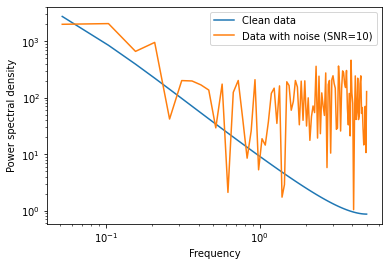

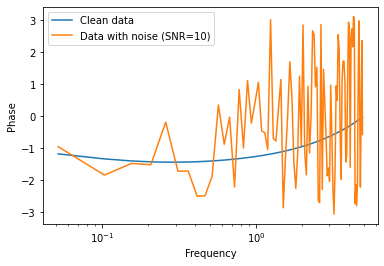

Burgers


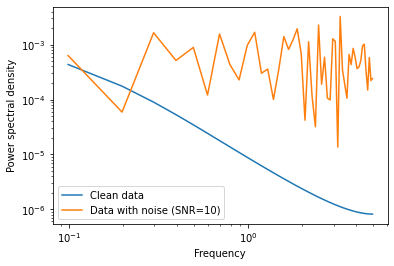

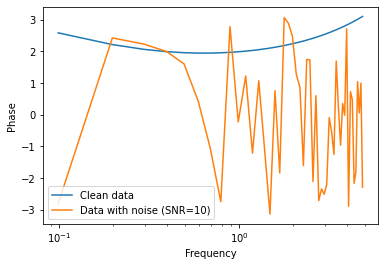

KDV


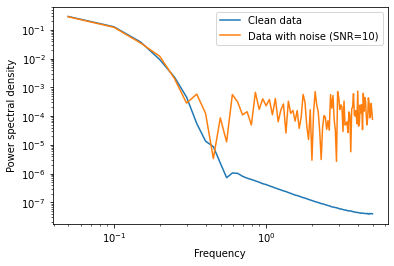

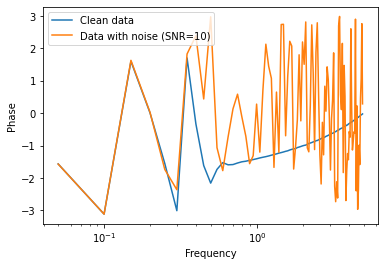

In [52]:
# SNR 10
# noise: Heat
print("Heat")
path = data_path+"/1_"+str(0)+".pkl"
pathn = data_path+"/1_"+str(22)+".pkl"
u,x,t = load_data(path)
un,x,t = load_data(pathn)
useries = u[:,len(x)//4]
useriesn = un[:,len(x)//4]
psd_plot(useries,t[1]-t[0])
psd_plot(useriesn,t[1]-t[0])
plt.legend(["Clean data","Data with noise (SNR=10)"])
plt.show()
phase_plot(useries,t[1]-t[0])
phase_plot(useriesn,t[1]-t[0])
plt.legend(["Clean data","Data with noise (SNR=10)"])
plt.show()

# noise: Burgers
print("Burgers")
path = data_path+"/2_"+str(0)+".pkl"
pathn = data_path+"/2_"+str(22)+".pkl"
u,x,t = load_data(path)
un,x,t = load_data(pathn)
useries = u[:,len(x)//4]
useriesn = un[:,len(x)//4]
psd_plot(useries,t[1]-t[0])
psd_plot(useriesn,t[1]-t[0])
plt.legend(["Clean data","Data with noise (SNR=10)"])
plt.show()
phase_plot(useries,t[1]-t[0])
phase_plot(useriesn,t[1]-t[0])
plt.legend(["Clean data","Data with noise (SNR=10)"])
plt.show()


# noise: KDV
print("KDV")
path = data_path+"/3_"+str(0)+".pkl"
pathn = data_path+"/3_"+str(22)+".pkl"
u,x,t = load_data(path)
un,x,t = load_data(pathn)
useries = u[:,len(x)//4]
useriesn = un[:,len(x)//4]
psd_plot(useries,t[1]-t[0])
psd_plot(useriesn,t[1]-t[0])
plt.legend(["Clean data","Data with noise (SNR=10)"])
plt.show()
phase_plot(useries,t[1]-t[0])
phase_plot(useriesn,t[1]-t[0])
plt.legend(["Clean data","Data with noise (SNR=10)"])
plt.show()

## Heat equation PSD for different smoothing in time domain

In [53]:
def smooth(u,x,t,sigma):
    """
    This function smooths the u matrix while keeping x and t the same.

    Inputs:
    u: The u matrix that is to be smoothed
    x: x values
    t: t values
    n: number of times initial gaussian filter is to be applied
    sigma: sigma value to be used in the initial gaussian filter
    m: number of times we need to perform KNN_Gaussian
    sigma_k: sigma_k[i][0] refers to the sigma value in the first gaussian filter of KNN_Gaussian for ith execution of KNN_Gaussian
             sigma_k[i][1] refers to the num of neighbours in the KNN regression of KNN_Gaussian for ith execution of KNN_Gaussian
             sigma_k[i][2] refers to the sigma value in the second gaussian filter of KNN_Gaussian for ith execution of KNN_Gaussian

    Output: 
    The smoothed u matrix
    """
    from scipy.ndimage import gaussian_filter
    u_cap=gaussian_filter(u,sigma=sigma)
    return u_cap

PSD


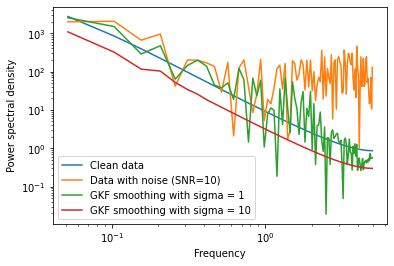

Phase


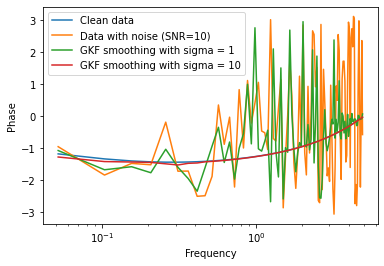

In [95]:
path = data_path+"/1_"+str(0)+".pkl"
pathn = data_path+"/1_"+str(22)+".pkl"
u,x,t = load_data(path)
un,x,t = load_data(pathn)
useries = u[:,len(x)//4]
useriesn = un[:,len(x)//4]

print("PSD")
legends=["Clean data","Data with noise (SNR=10)"]
psd_plot(useries,t[1]-t[0])
psd_plot(useriesn,t[1]-t[0])
for sigma in [1,10]:
    us=smooth(un,x,t,sigma)
    useriess = us[:,len(x)//4]
    psd_plot(useriess,t[1]-t[0])
    legends.append("GKF smoothing with sigma = "+str(sigma))
plt.legend(legends)
plt.show()

print("Phase")
legends=["Clean data","Data with noise (SNR=10)"]
phase_plot(useries,t[1]-t[0])
phase_plot(useriesn,t[1]-t[0])
for sigma in [1,10]:
    us=smooth(un,x,t,sigma)
    useriess = us[:,len(x)//4]
    phase_plot(useriess,t[1]-t[0])
    legends.append("GKF smoothing with sigma = "+str(sigma))
plt.legend(legends)
plt.show()

## Heat equation PSD for different smoothing in freq domain

#### Smoothing with Daniell kernel

In [86]:
def psd_plot_daniell(ts,T,m):
    N=len(ts)
    f, Pxx_den = signal.periodogram(ts,1/T)
    weights = [1/(2*m+1)]*(2*m+1)
    Pxx_den = np.convolve(Pxx_den,np.array(weights),'same')
    plt.loglog(f[1:],Pxx_den[1:])
    plt.xlabel("Frequency")
    plt.ylabel("Power spectral density")
    
def phase_plot_daniell(ts,T,m):
    N=len(ts)
    spectrum = scipy.fft.fft(ts)
    phase = list(np.angle(spectrum))
    weights = [1/(2*m+1)]*(2*m+1)
    phasen = np.convolve(phase[1:N//2],np.array(weights),'same')
    freq = fftfreq(N, T)
    plt.semilogx(freq[1:N//2],phasen)
    plt.xlabel("Frequency")
    plt.ylabel("Phase")

PSD


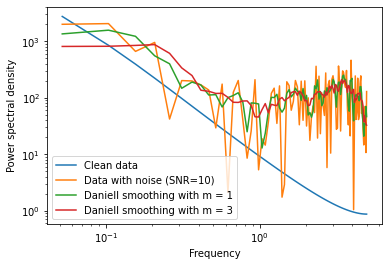

Phase


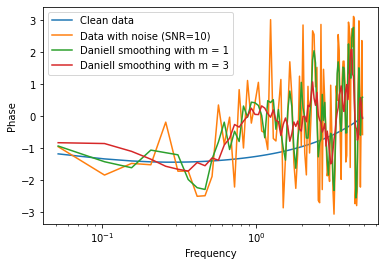

In [96]:
path = data_path+"/1_"+str(0)+".pkl"
pathn = data_path+"/1_"+str(22)+".pkl"
u,x,t = load_data(path)
un,x,t = load_data(pathn)
useries = u[:,len(x)//4]
useriesn = un[:,len(x)//4]

print("PSD")
legends=["Clean data","Data with noise (SNR=10)"]
psd_plot(useries,t[1]-t[0])
psd_plot(useriesn,t[1]-t[0])
for m in [1,3]:
    psd_plot_daniell(useriesn,t[1]-t[0],m)
    legends.append("Daniell smoothing with m = "+str(m))
plt.legend(legends)
plt.show()

print("Phase")
legends=["Clean data","Data with noise (SNR=10)"]
phase_plot(useries,t[1]-t[0])
phase_plot(useriesn,t[1]-t[0])
for m in [1,3]:
    phase_plot_daniell(useriesn,t[1]-t[0],m)
    legends.append("Daniell smoothing with m = "+str(m))
plt.legend(legends)
plt.show()

#### Smoothing with Gaussian kernel

In [91]:
def psd_plot_gaussian(ts,T,sigma):
    N=len(ts)
    f, Pxx_den = signal.periodogram(ts,1/T)
    Pxx_den = gaussian_filter1d(Pxx_den,sigma)
    plt.loglog(f[1:],Pxx_den[1:])
    plt.xlabel("Frequency")
    plt.ylabel("Power spectral density")
    
def phase_plot_gaussian(ts,T,sigma):
    N=len(ts)
    spectrum = scipy.fft.fft(ts)
    phase = list(np.angle(spectrum))
    phasen = gaussian_filter1d(phase[1:N//2],sigma)
    freq = fftfreq(N, T)
    plt.semilogx(freq[1:N//2],phasen)
    plt.xlabel("Frequency")
    plt.ylabel("Phase")

PSD


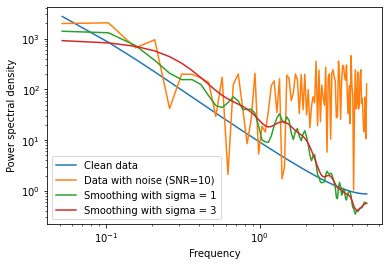

Phase


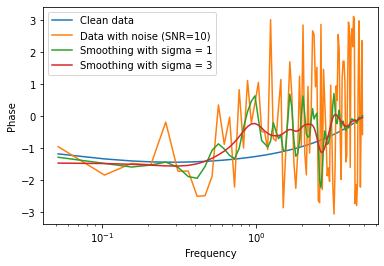

In [94]:
path = data_path+"/1_"+str(0)+".pkl"
pathn = data_path+"/1_"+str(22)+".pkl"
u,x,t = load_data(path)
un,x,t = load_data(pathn)
useries = u[:,len(x)//4]
useriesn = un[:,len(x)//4]

print("PSD")
legends=["Clean data","Data with noise (SNR=10)"]
psd_plot(useries,t[1]-t[0])
psd_plot(useriesn,t[1]-t[0])
for sigma in [1,3]:
    psd_plot_gaussian(useriess,t[1]-t[0],sigma)
    legends.append("Smoothing with sigma = "+str(sigma))
plt.legend(legends)
plt.show()

print("Phase")
legends=["Clean data","Data with noise (SNR=10)"]
phase_plot(useries,t[1]-t[0])
phase_plot(useriesn,t[1]-t[0])
for sigma in [1,3]:
    phase_plot_gaussian(useriess,t[1]-t[0],sigma)
    legends.append("Smoothing with sigma = "+str(sigma))
plt.legend(legends)
plt.show()